<a href="https://colab.research.google.com/github/amandasbassani/Notebooks_Processamento_Digital_de_Imagens/blob/main/Labs/Lab2_Amanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage.io



1) a)

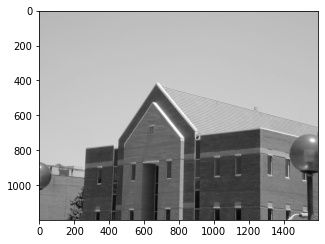

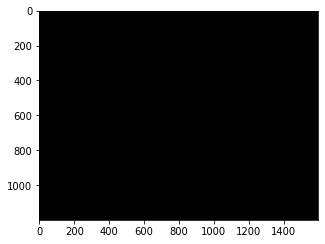

In [ ]:
im = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab2-Amanda/Lab2/Fig10.10(a).jpg')
plt.figure(figsize = (5,5))
plt.imshow(im,cmap='gray')
plt.show()
F = (np.fft.fft2(im))
plt.figure(figsize = (5,5))
plt.imshow(np.abs(F),cmap='gray')
plt.show()

b)

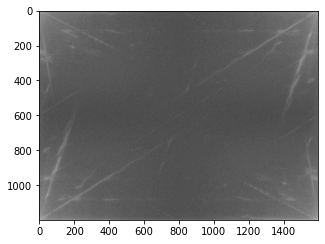

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(np.log(np.abs(F)+1),cmap='gray')
plt.show()

c)

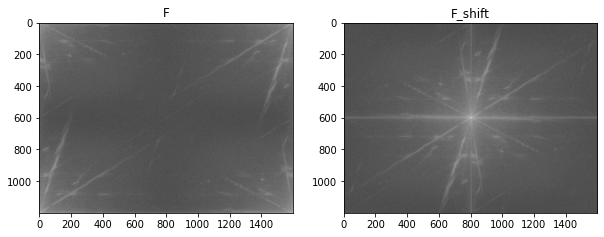

In [ ]:
F_shift = np.fft.fftshift(F)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(np.log(np.abs(F)+1),cmap='gray')
axs[1].imshow(np.log(np.abs(F_shift)+1),cmap='gray')
axs[0].set_title('F')
axs[1].set_title('F_shift');

2)

Text(0.5, 1.0, 'Gaussiano')

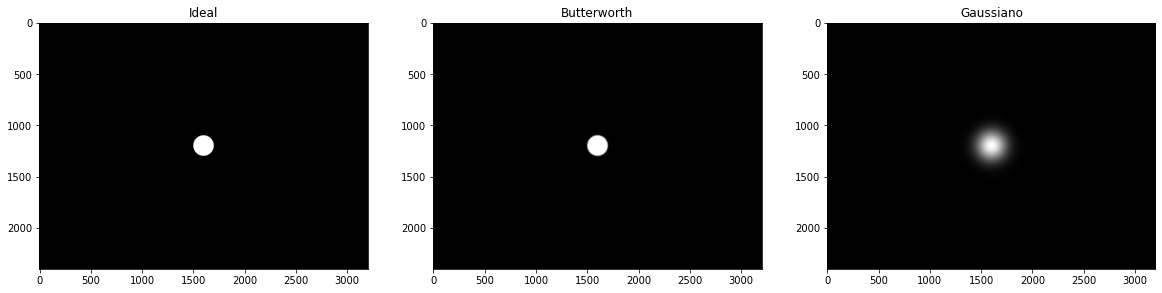

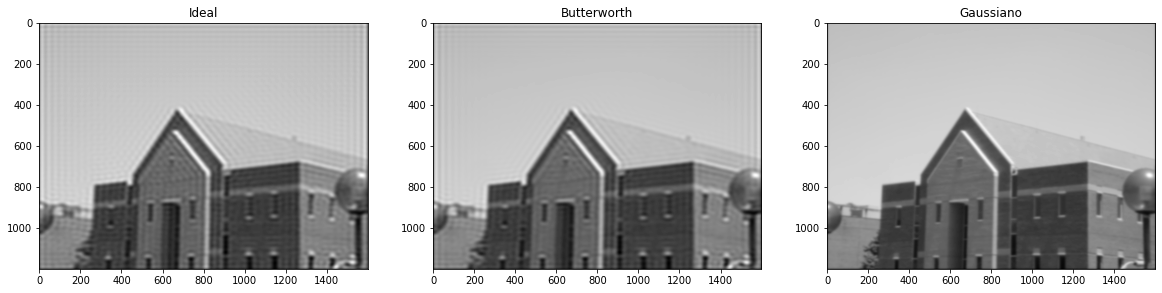

In [ ]:
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab2-Amanda/Lab2/Fig10.10(a).jpg')

# Passa baixas

im_fill = np.zeros((2*im2.shape[0],2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))
y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1)
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)
D0 = 100                                                    # mudar para outros valores e verificar como borra quando reduz

#Filtro Ideal
H_ideal = np.zeros((2*im2.shape[0],2*im2.shape[1]))
H_ideal[D <= D0] = 1
#Filtro Butterworth ordem 2
n = 20                                                      # mudar para ver os resultados, ring maior para maior n
H_but = np.zeros((2*im2.shape[0],2*im2.shape[1]))
H_but = 1/(1+(D/D0)**(2*n))
#Filtro Gaussiano
H_gauss = np.exp(-(D**2)/(2*(D0**2)))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(H_ideal,cmap='gray')
axs[1].imshow(H_but,cmap='gray')
axs[2].imshow(H_gauss,cmap='gray')
axs[0].set_title('Ideal')
axs[1].set_title('Butterworth')
axs[2].set_title('Gaussiano')

#Filtrangem Ideal
G_ideal = F_shift*H_ideal
im_ideal_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_ideal)))
im_ideal = im_ideal_fill[0:im2.shape[0],0:im2.shape[1]]
#Filtrangem Butterworth
G_but = F_shift*H_but
im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but)))
im_but = im_but_fill[0:im2.shape[0],0:im2.shape[1]]
#Filtrangem Gaussiano
G_gauss = F_shift*H_gauss
im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss)))
im_gauss = im_gauss_fill[0:im2.shape[0],0:im2.shape[1]]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(im_ideal,cmap='gray')
axs[1].imshow(im_but,cmap='gray')
axs[2].imshow(im_gauss,cmap='gray')
axs[0].set_title('Ideal')
axs[1].set_title('Butterworth')
axs[2].set_title('Gaussiano')

Text(0.5, 1.0, 'Gaussiano')

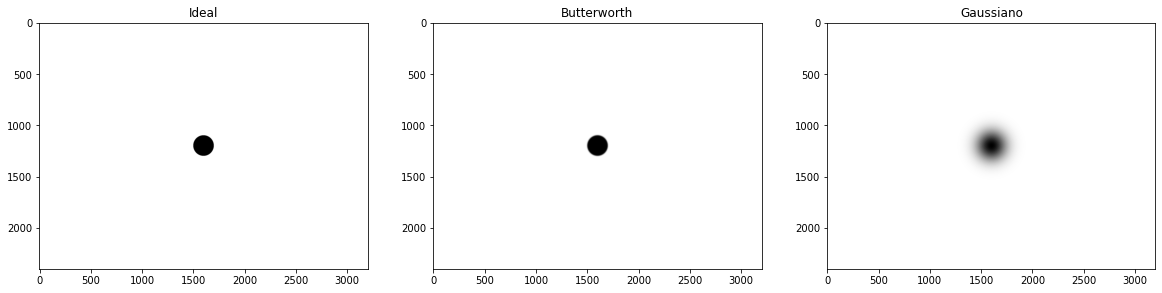

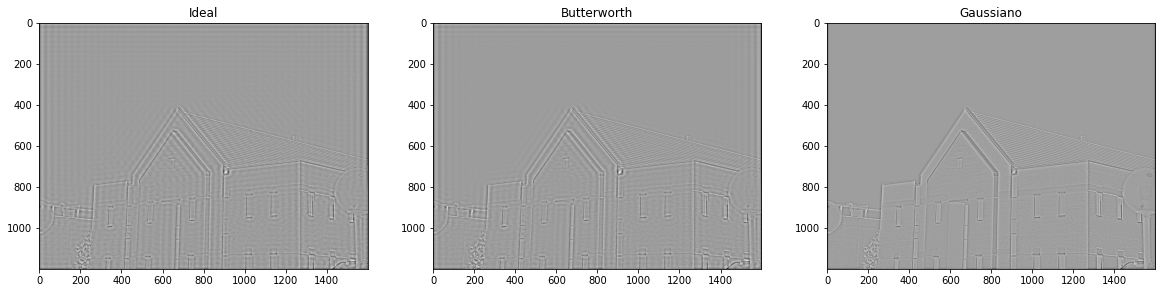

In [ ]:
# Passa alta

#Filtro Ideal
H_ideal = 1 - H_ideal

#Filtro Butterworth ordem 2
n = 2                                                      # mudar para ver os resultados, ring maior para maior n
H_but = 1 - H_but

#Filtro Gaussiano
H_gauss = 1 - H_gauss

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(H_ideal,cmap='gray')
axs[1].imshow(H_but,cmap='gray')
axs[2].imshow(H_gauss,cmap='gray')
axs[0].set_title('Ideal')
axs[1].set_title('Butterworth')
axs[2].set_title('Gaussiano')

#Filtrangem Ideal
G_ideal = F_shift*H_ideal
G_ideal = 1 - G_ideal

im_ideal_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_ideal)))
im_ideal = im_ideal_fill[0:im2.shape[0],0:im2.shape[1]]

#Filtrangem Butterworth
G_but = F_shift*H_but
G_but = 1 - G_but

im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but)))
im_but = im_but_fill[0:im2.shape[0],0:im2.shape[1]]

#Filtrangem Gaussiano
G_gauss = F_shift*H_gauss
G_gauss = 1 - G_gauss

im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss)))
im_gauss = im_gauss_fill[0:im2.shape[0],0:im2.shape[1]]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(im_ideal,cmap='gray') #,vmin=0,vmax=255)                         # limitar o valor min = 0 e valor max = 255
axs[1].imshow(im_but,cmap='gray')
axs[2].imshow(im_gauss,cmap='gray')
axs[0].set_title('Ideal')
axs[1].set_title('Butterworth')
axs[2].set_title('Gaussiano')

3)

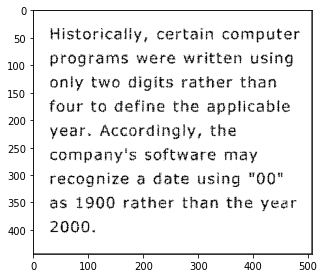

Text(0.5, 1.0, 'Gaussiano')

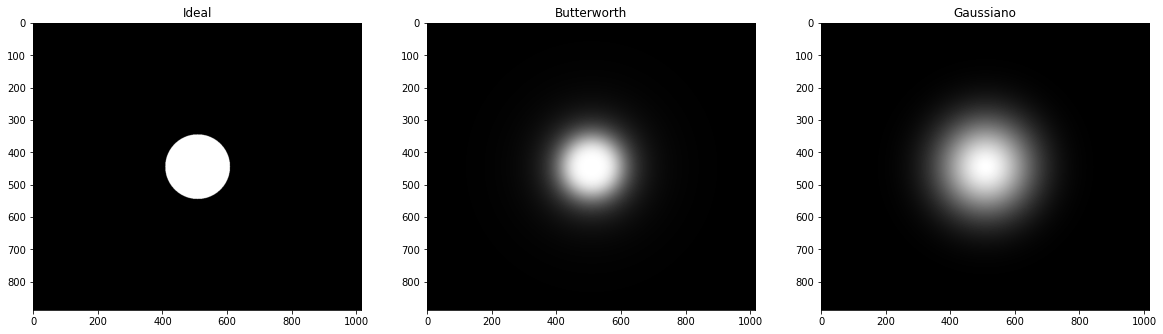

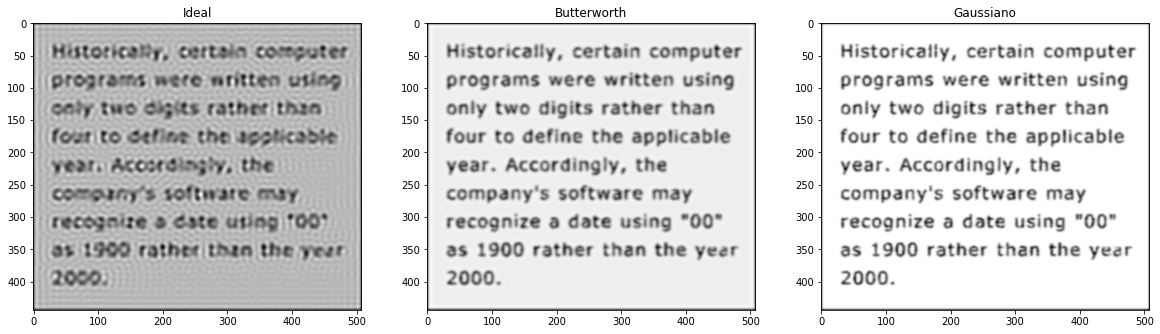

In [ ]:
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab2-Amanda/Lab2/Fig4.19(a).jpg')

plt.figure(figsize = (5,5)) #redimensiona a imagem
plt.imshow(im2,cmap='gray') #mostra a imagem em escala de cinza
plt.show()

# Passa baixas

im_fill = np.zeros((2*im2.shape[0],2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))
y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1)
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)
D0 = 100                                                    # mudar para outros valores e verificar como borra quando reduz

#Filtro Ideal
H_ideal = np.zeros((2*im2.shape[0],2*im2.shape[1]))
H_ideal[D <= D0] = 1
#Filtro Butterworth ordem 2
n = 2                                                      # mudar para ver os resultados, ring maior para maior n
H_but = np.zeros((2*im2.shape[0],2*im2.shape[1]))
H_but = 1/(1+(D/D0)**(2*n))
#Filtro Gaussiano
H_gauss = np.exp(-(D**2)/(2*(D0**2)))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(H_ideal,cmap='gray')
axs[1].imshow(H_but,cmap='gray')
axs[2].imshow(H_gauss,cmap='gray')
axs[0].set_title('Ideal')
axs[1].set_title('Butterworth')
axs[2].set_title('Gaussiano')

#Filtrangem Ideal
G_ideal = F_shift*H_ideal
im_ideal_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_ideal)))
im_ideal = im_ideal_fill[0:im2.shape[0],0:im2.shape[1]]
#Filtrangem Butterworth
G_but = F_shift*H_but
im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but)))
im_but = im_but_fill[0:im2.shape[0],0:im2.shape[1]]
#Filtrangem Gaussiano
G_gauss = F_shift*H_gauss
im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss)))
im_gauss = im_gauss_fill[0:im2.shape[0],0:im2.shape[1]]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(im_ideal,cmap='gray')
axs[1].imshow(im_but,cmap='gray')
axs[2].imshow(im_gauss,cmap='gray')
axs[0].set_title('Ideal')
axs[1].set_title('Butterworth')
axs[2].set_title('Gaussiano')

4)

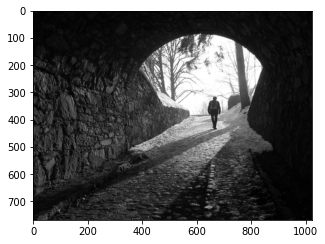

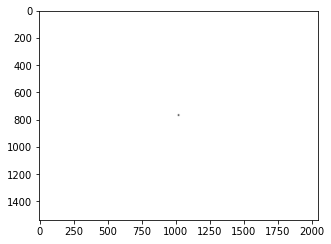

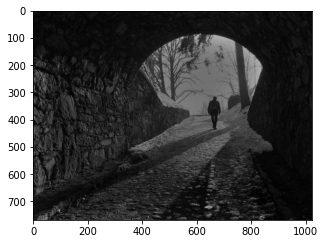

In [ ]:
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab2-Amanda/Lab2/homo1.jpg')

plt.figure(figsize = (5,5)) #redimensiona a imagem
plt.imshow(im2,cmap='gray') #mostra a imagem em escala de cinza
plt.show()

im2 = np.log(np.double(im2)+1)

im_fill = np.zeros((2*im2.shape[0],2*im2.shape[1]))
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2

F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1)
u, v = np.meshgrid(x, y)
D = np.sqrt(u**2 + v**2)
D0 = 30                                                   # mudar para outros valores e verificar como borra quando reduz

c = 25
y_H = 1
y_L = 0.7

H = (y_H - y_L)*(1-np.exp(-c*(D**2/D0**2))) + y_L

plt.figure(figsize = (5,5)) #redimensiona a imagem
plt.imshow(H,cmap='gray') #mostra a imagem em escala de cinza
plt.show()

G = F_shift*H
im_fill = np.real(np.fft.ifft2(np.fft.fftshift(G)))
im = im_fill[0:im2.shape[0],0:im2.shape[1]]

im = np.exp(np.double(im))

plt.figure(figsize = (5,5)) #redimensiona a imagem
plt.imshow(im,cmap='gray') #mostra a imagem em escala de cinza
plt.show()



5)

Text(0.5, 1.0, 'Com ruído')

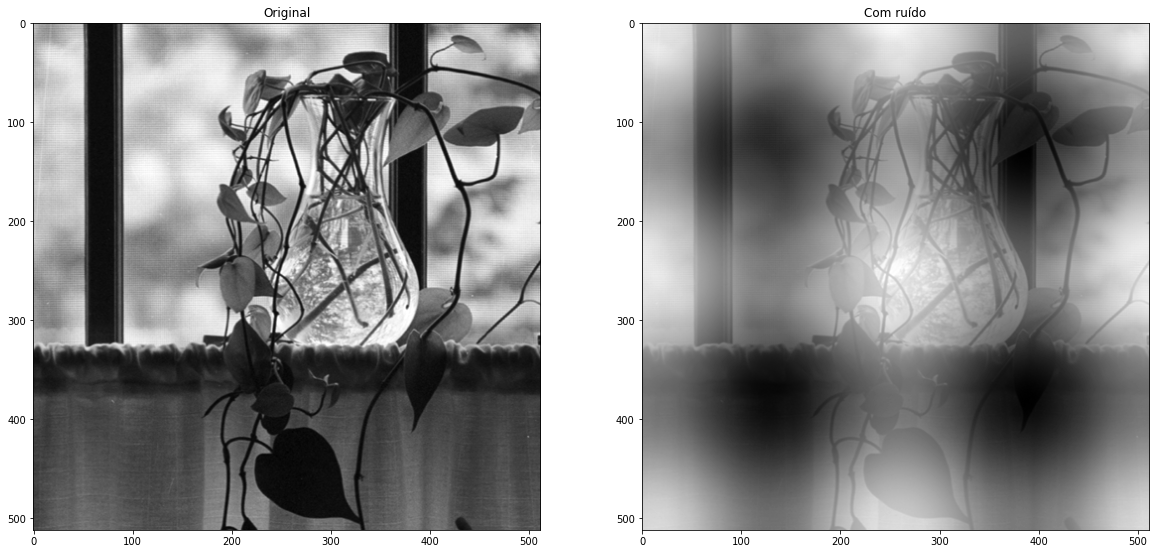

In [ ]:


#Para adicionar o ruído
im3 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab2-Amanda/Lab2/Fig7.01.jpg')
F_shift = np.fft.fftshift(np.fft.fft2(im3))
max_F = np.max(F_shift.ravel())
center = [int(np.round(im3.shape[0]/2)),int(np.round(im3.shape[1]/2))]
pontos = [(2, 0), (0, 2)]
for i in range(len(pontos)):
    F_shift[center[0]-pontos[i][0],center[1]-pontos[i][1]] = 1*max_F - 0.2*max_F*i
    F_shift[center[0]+pontos[i][0],center[1]+pontos[i][1]] = 1*max_F + 0.2*max_F*i
im_3 = np.real(np.fft.ifft2(np.fft.fftshift(F_shift)))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
axs[0].imshow(im3,cmap='gray')
axs[1].imshow(im_3,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Com ruído')